#### YOLOV8 Object Dection from pic


In [1]:
!pip install ultralytics opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling n

Saving imageobjects.jpeg to imageobjects (2).jpeg
Saving imageobjects1.jpeg to imageobjects1 (2).jpeg
Saving imagesobjects2.jpg to imagesobjects2 (2).jpg

image 1/1 /content/imageobjects (2).jpeg: 480x640 1 laptop, 1 keyboard, 1 cell phone, 1 book, 196.6ms
Speed: 4.9ms preprocess, 196.6ms inference, 1.8ms postprocess per image at shape (1, 3, 480, 640)
image: imageobjects (2).jpeg | size: 360x511 | 4 objects | inference: 196.6ms
  - laptop: [136, 31, 380, 343] (0.96)
  - cell phone: [393, 162, 439, 240] (0.91)
  - book: [0, 178, 139, 330] (0.59)
  - keyboard: [152, 194, 359, 267] (0.27)
---


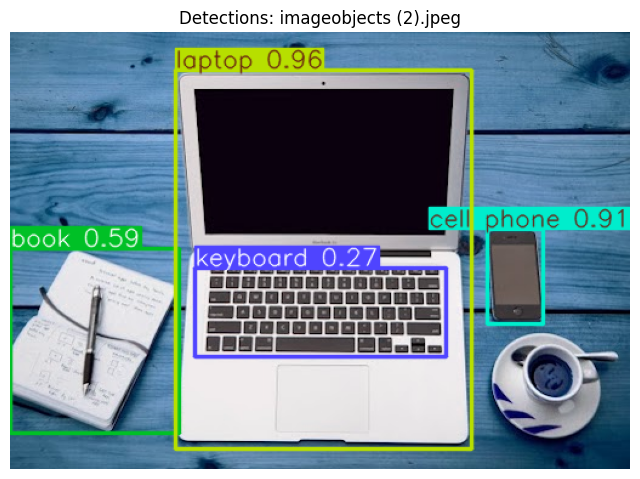

Saved: detected_imageobjects (2).jpeg

image 1/1 /content/imageobjects1 (2).jpeg: 448x640 2 persons, 1 laptop, 1 book, 198.7ms
Speed: 5.0ms preprocess, 198.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
image: imageobjects1 (2).jpeg | size: 667x1000 | 4 objects | inference: 198.7ms
  - laptop: [278, 38, 718, 441] (0.92)
  - person: [508, 269, 806, 660] (0.7)
  - person: [182, 510, 306, 665] (0.54)
  - book: [47, 359, 369, 664] (0.32)
---


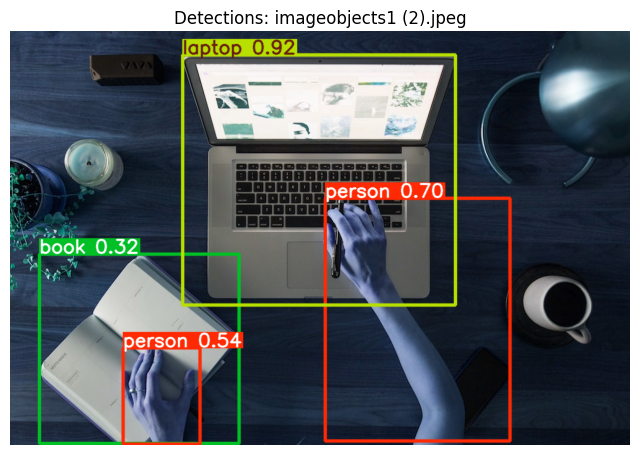

Saved: detected_imageobjects1 (2).jpeg

image 1/1 /content/imagesobjects2 (2).jpg: 640x640 2 persons, 2 trucks, 280.6ms
Speed: 5.3ms preprocess, 280.6ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)
image: imagesobjects2 (2).jpg | size: 225x224 | 4 objects | inference: 280.6ms
  - truck: [43, 47, 186, 143] (0.83)
  - person: [5, 57, 29, 115] (0.68)
  - person: [12, 56, 30, 114] (0.55)
  - truck: [0, 62, 73, 105] (0.42)
---


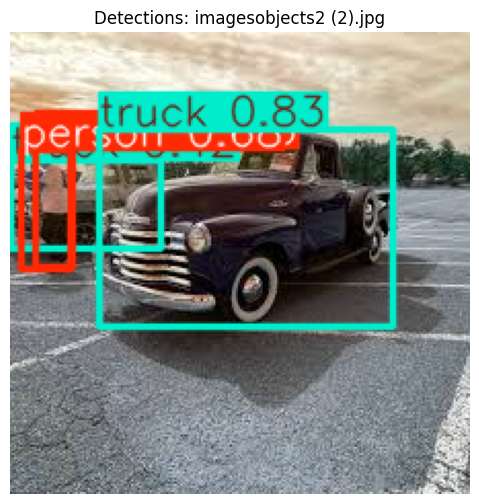

Saved: detected_imagesobjects2 (2).jpg


In [21]:
# Import required libraries
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt

# Load YOLOv8 model (nano version)
model = YOLO('yolov8n.pt')

# Example: If using Google Colab upload
from google.colab import files
uploaded = files.upload()  # This lets user upload multiple images

# Process each uploaded image
for image_path in uploaded:
    # Run YOLOv8 on image
    results = model(image_path)

    # Read and prepare image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    h, w, _ = img.shape

    # Show detection results
    for result in results:
        print(f"image: {image_path} | size: {h}x{w} | {len(result.boxes)} objects | inference: {result.speed['inference']:.1f}ms")
        for box in result.boxes:
            cls = int(box.cls[0])
            prob = float(box.conf[0])
            label = model.names[cls]
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            print(f"  - {label}: [{x1}, {y1}, {x2}, {y2}] ({round(prob, 2)})")
        print('---')

    # Show image with detections
    annotated_img = results[0].plot()
    plt.figure(figsize=(8, 6))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.title(f'Detections: {image_path}')
    plt.show()

    # Optionally save the image
    output_path = f"detected_{image_path}"
    cv2.imwrite(output_path, cv2.cvtColor(annotated_img, cv2.COLOR_RGB2BGR))
    print(f"Saved: {output_path}")